<h3>Дополительная лабороторная работа - недвижимость Москва и МО 🏗️ <h3>

Для задачи регрессии часто используются такие метрики, как средняя абсолютная ошибка (MAE), среднеквадратичная ошибка (MSE) и корневая среднеквадратичная ошибка (RMSE). Для данной задачи я выберу RMSE, поскольку она учитывает ошибки квадратично, делая акцент на больших отклонениях, что важно при оценке стоимости недвижимости, где большие отклонения могут привести к значительным финансовым потерям.

<h4>Описание данных<h4>

| Название столбца   | Описание                                       |
|---------------------|-----------------------------------------------|
| productname    | Наименование объекта недвижимости              |
| period          | Дата                                          |
| postcode        | Почтовый индекс                               |
| addressname    | Адрес объекта                                 |
| lat             | Координаты (широта)                          |
| lon             | Координаты (долгота)                         |
| objecttype     | Тип объекта                                   |
| totalsquare    | Общая площадь                                 |
| rooms           | Количество комнат                             |
| floor           | Этаж                                          |
| city            | Город                                         |
| settlement      | Населенный пункт                              |
| district        | Район                                         |
| area            | Микрорайон                                    |
| description     | Текст объявления                               |
| source          | Источник                                      |


<h4>Импорт библиотек<h4>

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
import lime
from lime.lime_tabular import LimeTabularExplainer

import shap

<h4>Загрузка данных<h4>

In [103]:
file_path = '/Users/daryaarestova/dev/ML-for-Science/realty_data.csv'
df = pd.read_csv(file_path)


In [104]:
data_info = df.info()
data_head = df.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98822 entries, 0 to 98821
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  98822 non-null  object 
 1   period        0 non-null      float64
 2   price         98822 non-null  int64  
 3   postcode      93675 non-null  float64
 4   address_name  98821 non-null  object 
 5   lat           98822 non-null  float64
 6   lon           98822 non-null  float64
 7   object_type   98822 non-null  object 
 8   total_square  98822 non-null  float64
 9   rooms         94840 non-null  float64
 10  floor         98822 non-null  float64
 11  city          91928 non-null  object 
 12  settlement    6894 non-null   object 
 13  district      75111 non-null  object 
 14  area          19498 non-null  object 
 15  description   98573 non-null  object 
 16  source        98822 non-null  object 
dtypes: float64(7), int64(1), object(9)
memory usage: 12.8+ MB


(None,
           product_name  period      price  postcode  \
 0  3-комнатная, 137 м²     NaN   63000000  127473.0   
 1      Студия, 16,7 м²     NaN    3250000  108815.0   
 2   3-комнатная, 76 м²     NaN   16004680       NaN   
 3   1-комнатная, 24 м²     NaN    7841776       NaN   
 4  3-комнатная, 126 м²     NaN  120000000  121352.0   
 
                    address_name        lat        lon object_type  \
 0  2-й Щемиловский переулок, 5а  55.778894  37.608844    Квартира   
 1               Харлампиева, 46  55.551025  37.313054    Квартира   
 2             ЖК Прокшино, 8 к4  55.594802  37.431264    Квартира   
 3             ЖК Прокшино, 6 к2  55.594332  37.428099    Квартира   
 4              Давыдковская, 18  55.721097  37.464342    Квартира   
 
    total_square  rooms  floor    city settlement                  district  \
 0         137.0    3.0    6.0  Москва        NaN            Тверской район   
 1          16.7    NaN    1.0  Москва        NaN  Филимонковское поселение

Анализ данных

| Параметр              | Значение                                |
|-----------------------|----------------------------------------|
| Объем данных      | 98,822 строки и 17 столбцов           |
| Проблемные столбцы| Period: полностью состоит из пропусков|
|                       | Postcode: имеет пропуски              |
|                       | Rooms: имеет пропуски                  |
|                       | City: имеет пропуски                   |
|                       | Settlement: имеет пропуски              |
|                       | District: имеет пропуски                |
|                       | Area: имеет пропуски                    |
| Ключевые числовые признаки | Price (цена недвижимости)         |
|                       | Lat (широта)                          |
|                       | Lon (долгота)                         |
|                       | Totalsquare (общая площадь)          |
|                       | Rooms (количество комнат)              |
|                       | Floor (этаж)                          |
| **Категориальные признаки** | Objecttype (тип объекта)             |
|                       | City (город)                          |
|                       | Settlement (населенный пункт)         |
|                       | District (район)                      |
|                       | Area (область)                        |
|                       | Source (источник)                     |


Удаление 'period'

In [105]:
data = df.drop(columns=['period'])

In [106]:
numerical_stats = data.describe()

Распределение переменной "цена"

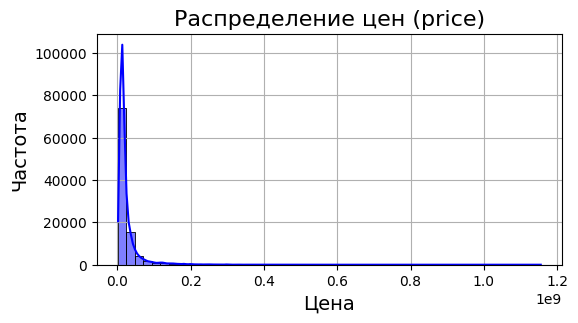

In [107]:
plt.figure(figsize=(6, 3))
sns.histplot(data['price'], bins=50, kde=True, color='blue')
plt.title('Распределение цен (price)', fontsize=16)
plt.xlabel('Цена', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.grid(True)
plt.show()

Проверка пропущенных значений

In [108]:
missing_values = data.isnull().sum().sort_values(ascending=False)

numerical_stats, missing_values

(              price       postcode           lat           lon  total_square  \
 count  9.882200e+04   93675.000000  98822.000000  98822.000000  98822.000000   
 mean   2.512122e+07  124503.585119     55.742691     37.586404     66.092176   
 std    3.607234e+07   11956.742109      0.107044      0.169843     48.816204   
 min    1.900000e+06  101000.000000     55.468426     37.136489      8.000000   
 25%    1.050000e+07  115516.000000     55.673101     37.471611     40.100000   
 50%    1.516713e+07  123154.000000     55.745474     37.569365     56.400000   
 75%    2.500000e+07  140003.000000     55.817697     37.689568     75.700000   
 max    1.155219e+09  143989.000000     56.028824     38.122467   2070.000000   
 
               rooms         floor  
 count  94840.000000  98822.000000  
 mean       2.197427      9.905274  
 std        1.038628      8.219180  
 min        1.000000      1.000000  
 25%        1.000000      4.000000  
 50%        2.000000      8.000000  
 75%      

Выводы

1. Распределение цен:

Распределение цен (price) имеет длинный хвост, что может говорить о выбросах.
Диапазон цен варьируется от 1,9 млн до более 1 млрд, что требует нормализации или обработки выбросов.

2. Числовые признаки:

Средняя площадь недвижимости (total_square) составляет 66 м², минимальная — 8 м², максимальная — 2070 м², что также может включать выбросы.
Количество комнат (rooms) достигает 15, что встречается крайне редко.

3. Пропуски:

Самые большие пропуски в столбцах:

- settlement (93% пропусков), вероятно, этот столбец можно исключить.
- area (80% пропусков) и district (24%), их нужно обработать или исключить.

Пропуски в rooms и postcode также требуют заполнения.

Scatter plot

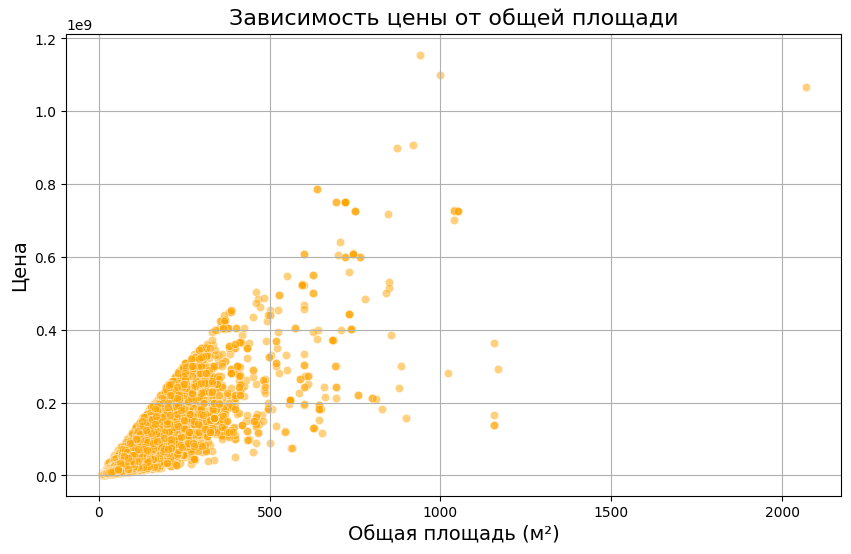

In [109]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['total_square'], y=data['price'], alpha=0.5, color='orange')
plt.title('Зависимость цены от общей площади', fontsize=16)
plt.xlabel('Общая площадь (м²)', fontsize=14)
plt.ylabel('Цена', fontsize=14)
plt.grid(True)
plt.show()

Box plot

/var/folders/ww/y7s24j9d0gz3mfzgj1twl3940000gn/T/ipykernel_22552/1701195568.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['rooms'], y=data['price'], showfliers=False, palette="coolwarm")


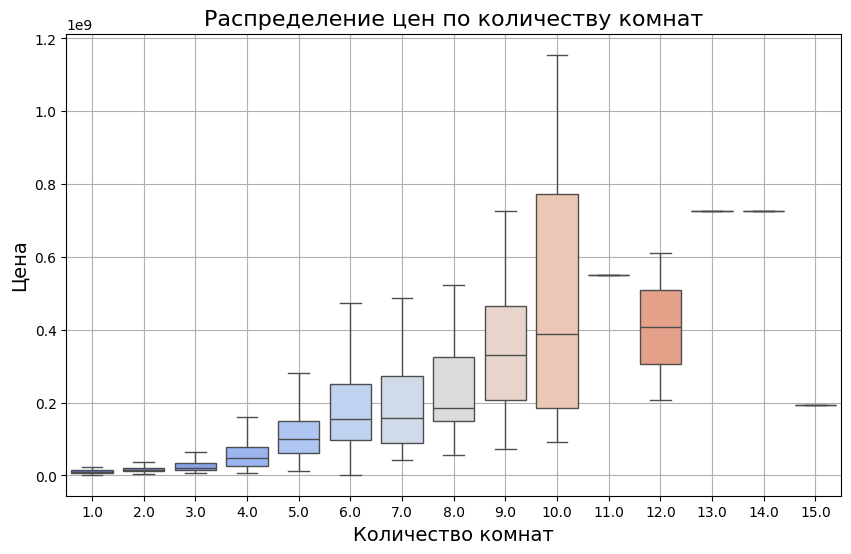

In [110]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['rooms'], y=data['price'], showfliers=False, palette="coolwarm")
plt.title('Распределение цен по количеству комнат', fontsize=16)
plt.xlabel('Количество комнат', fontsize=14)
plt.ylabel('Цена', fontsize=14)
plt.grid(True)
plt.show()


Корреляционная матрица для числовых признаков

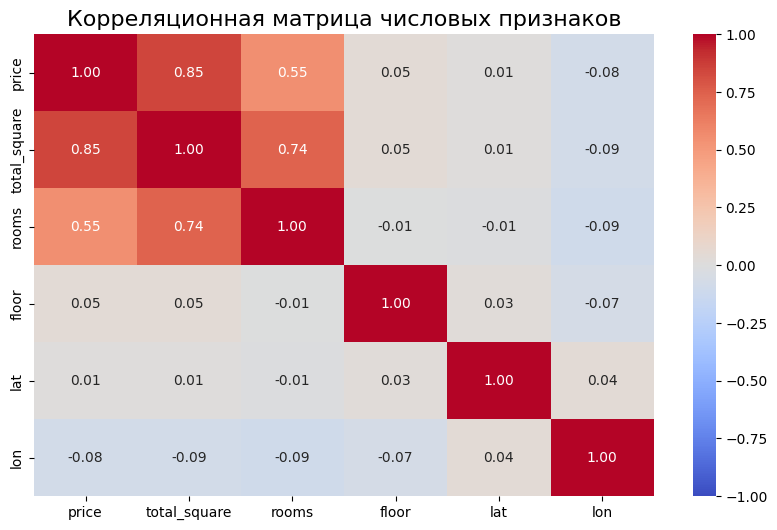

In [111]:
correlation_matrix = data[['price', 'total_square', 'rooms', 'floor', 'lat', 'lon']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляционная матрица числовых признаков', fontsize=16)
plt.show()

Выводы

1. Связь цены с общей площадью:
График показывает положительную корреляцию между ценой и площадью. Однако есть выбросы для объектов с большой площадью (более 500 м²), которые могут быть аномальными или элитными объектами.

2. Цены в зависимости от количества комнат:
Большинство объектов имеют 1–3 комнаты, и цены логично возрастают с увеличением количества комнат. Однако объекты с большим количеством комнат (10+) также включают выбросы.

3. Корреляционная матрица:
Самая сильная корреляция наблюдается между ценой (price) и площадью (total_square) — 0.69.
Другие признаки, такие как количество комнат и этаж, имеют слабую корреляцию с ценой.

<h3>Удаляю выборсы<h3>

In [112]:
# Столбцы с большим количеством пропусков (например, 'period', 'settlement', 'area') будут удалены
columns_to_drop = ['product_name', 'period', 'postcode', 'address_name', 'description', 
                   'settlement', 'district', 'area', 'source']

df_cleaned = df.drop(columns=columns_to_drop)

# Удаляем строки с пропущенными значениями в целевом столбце или важных признаках
df_cleaned = df_cleaned.dropna(subset=['price', 'total_square', 'rooms', 'floor', 'lat', 'lon'])

# Заполнение пропусков в категориальных признаках значением "unknown"
df_cleaned['city'] = df_cleaned['city'].fillna('unknown')
df_cleaned['object_type'] = df_cleaned['object_type'].fillna('unknown')

# Убедимся, что данные готовы
df_cleaned.info(), df_cleaned.head()


<class 'pandas.core.frame.DataFrame'>
Index: 94840 entries, 0 to 98821
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         94840 non-null  int64  
 1   lat           94840 non-null  float64
 2   lon           94840 non-null  float64
 3   object_type   94840 non-null  object 
 4   total_square  94840 non-null  float64
 5   rooms         94840 non-null  float64
 6   floor         94840 non-null  float64
 7   city          94840 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 6.5+ MB


(None,
        price        lat        lon object_type  total_square  rooms  floor  \
 0   63000000  55.778894  37.608844    Квартира         137.0    3.0    6.0   
 2   16004680  55.594802  37.431264    Квартира          76.0    3.0    6.0   
 3    7841776  55.594332  37.428099    Квартира          24.0    1.0   10.0   
 4  120000000  55.721097  37.464342    Квартира         126.0    3.0   16.0   
 5   13300000  55.557342  37.809447    Квартира          74.0    3.0   14.0   
 
       city  
 0   Москва  
 2   Москва  
 3   Москва  
 4   Москва  
 5  unknown  )

In [113]:
df.tail(50)

product_name  period      price  postcode  \
98772   2-комнатная, 53,2 м²     NaN   15600000  125475.0   
98773     3-комнатная, 78 м²     NaN   26900000  119361.0   
98774  3-комнатная, 103,1 м²     NaN   55000000       NaN   
98775   2-комнатная, 97,9 м²     NaN   30349000  125475.0   
98776   3-комнатная, 71,9 м²     NaN   14500000  140016.0   
98777     3-комнатная, 77 м²     NaN   22200000  121359.0   
98778     1-комнатная, 34 м²     NaN    6200000  142714.0   
98779     1-комнатная, 38 м²     NaN   10107105  107143.0   
98780     1-комнатная, 31 м²     NaN   12800000  115419.0   
98781   3-комнатная, 79,7 м²     NaN   29699000  121165.0   
98782  3-комнатная, 114,7 м²     NaN   39468270  111033.0   
98783   3-комнатная, 93,5 м²     NaN   39500000  125167.0   
98784   2-комнатная, 59,3 м²     NaN    9600000  142720.0   
98785   2-комнатная, 68,8 м²     NaN   41681472  119136.0   
98786   3-комнатная, 61,2 м²     NaN   16216698       NaN   
98787     3-комнатная, 90 м²     NaN   90000000  123100.0   
98788     2-комнатная, 55 м²     NaN   31500000  109028.0   
98789   4-комнатная, 71,9 м²     NaN   17004132       NaN   
98790   2-комнатная, 67,9 м²     NaN   12731250  108836.0   
98791         Студия, 170 м²     NaN   95000000  127051.0   
98792  3-комнатная, 126,4 м²     NaN  149152000  119334.0   
98793     3-комнатная, 79 м²     NaN   27500000  127018.0   
98794     2-комнатная, 50 м²     NaN    7800000  143989.0   
98795          Студия, 30 м²     NaN    6100000  140016.0   
98796  4-комнатная, 163,6 м²     NaN  139999999  123022.0   
98797    4-комнатная, 168 м²     NaN  163316295  109028.0   
98798   2-комнатная, 37,6 м²     NaN   13791948  125504.0   
98799   3-комнатная, 50,8 м²     NaN   23809894  121471.0   
98800     2-комнатная, 52 м²     NaN   17300000  119607.0   
98801   2-комнатная, 49,6 м²     NaN   16665600  117420.0   
98802  6-комнатная, 114,6 м²     NaN   73000000  119034.0   
98803        Студия, 26,8 м²     NaN    7390406  109316.0   
98804   2-комнатная, 78,1 м²     NaN   34900000  119192.0   
98805   2-комнатная, 64,9 м²     NaN    8700000  142029.0   
98806     2-комнатная, 56 м²     NaN   11655000  108811.0   
98807     3-комнатная, 75 м²     NaN   53000000  123104.0   
98808   2-комнатная, 47,7 м²     NaN   12999999  125481.0   
98809   3-комнатная, 64,3 м²     NaN   28000000  111024.0   
98810   1-комнатная, 33,5 м²     NaN    8500000  108823.0   
98811     3-комнатная, 87 м²     NaN   48900000  123290.0   
98812   3-комнатная, 60,9 м²     NaN   12800000  115561.0   
98813   3-комнатная, 85,2 м²     NaN   17650000  109469.0   
98814     1-комнатная, 40 м²     NaN    6000000  140060.0   
98815     2-комнатная, 57 м²     NaN   15500000  143085.0   
98816   2-комнатная, 48,3 м²     NaN   16150000  119526.0   
98817     2-комнатная, 42 м²     NaN   12183528  125212.0   
98818   2-комнатная, 63,5 м²     NaN   34925000  129090.0   
98819   1-комнатная, 34,4 м²     NaN   10000000  117534.0   
98820     3-комнатная, 56 м²     NaN   15999000  109518.0   
98821   2-комнатная, 55,1 м²     NaN   16750000  109316.0   

                                           address_name        lat        lon  \
98772                                    Дыбенко, 10 к1  55.869712  37.486970   
98773                       Большая Очаковская улица, 3  55.688876  37.466100   
98774                проспект Генерала Дорохова, 39 к1е  55.717142  37.498146   
98775                                    Дыбенко, 38 к1  55.876695  37.483992   
98776                                      Дружбы, 5 к2  55.703904  37.962387   
98777                                  Бобруйская, 15/1  55.738107  37.397033   
98778                       Ново-Молоковский бульвар, 8  55.562179  37.851657   
98779                       Открытое шоссе, вл18/1 к1/2  55.817697  37.746318   
98780                2-й Верхний Михайловский проезд, 4  55.709699  37.603650   
98781          улица Студенческая, 44/28 / Киевская, 28  55.739216  37.537754   
98782        

<h4>Кодирование категориальных признаков<h4>

In [114]:
categorical_features = ['object_type', 'city']
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_features = encoder.fit_transform(df_cleaned[categorical_features])


In [115]:
encoded_features_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))
encoded_features_df.reset_index(drop=True, inplace=True)

<h4>Создание массива<h4>

In [116]:
X = pd.concat([
    pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features)),
    df_cleaned[['lat', 'lon', 'total_square', 'rooms', 'floor']].reset_index(drop=True)
], axis=1)
y = df_cleaned['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
assert set(X_train.columns) == set(X_test.columns)

<h4>Разделение данных на тестовую и обучающую выборки <h4>

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((75872, 26), (18968, 26), (75872,), (18968,))

<h4>Константная модель<h4>

Модель предсказывает среднее значение целевой переменной для всех объектов.

In [119]:
dummy_regressor = DummyRegressor(strategy='mean')
dummy_regressor.fit(X_train, y_train)

DummyRegressor()

Предсказание и расчет RMSE для константной модели

In [120]:
y_pred_dummy = dummy_regressor.predict(X_test)
rmse_dummy = np.sqrt(mean_squared_error(y_test, y_pred_dummy))
print(f'RMSE для константной модели: {rmse_dummy:.2f}')

RMSE для константной модели: 34912776.25


<h4>Линейная регрессия<h4>

StandardScaler для нормализации данных в Pipeline

In [121]:
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

Предсказание и расчет RMSE для линейной регрессии

In [122]:
y_pred_lr = pipe_lr.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f'RMSE для линейной регрессии: {rmse_lr:.2f}')

RMSE для линейной регрессии: 17770530.56


<h4>Random Forest<h4>

In [123]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='neg_root_mean_squared_error')

Выявление лучших параметров

In [124]:
best_params = grid_search.best_params_
print(f'Лучшие параметры: {best_params}')

Лучшие параметры: {'max_depth': None, 'n_estimators': 200}


Обучение модели с лучшими параметрами

In [125]:
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

Предсказание и расчет RMSE для Random Forest

In [126]:
y_pred_best_rf = best_rf.predict(X_test)
rmse_best_rf = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
print(f'RMSE для лучшего RF: {rmse_best_rf:.2f}')

RMSE для лучшего RF: 8847361.30


RMSE для лучшего RF: 8847361.30

Такой большой по причине, что стоимость квартиры измеряется в большой величине 

Анализ признаков

In [127]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_rf.feature_importances_
})

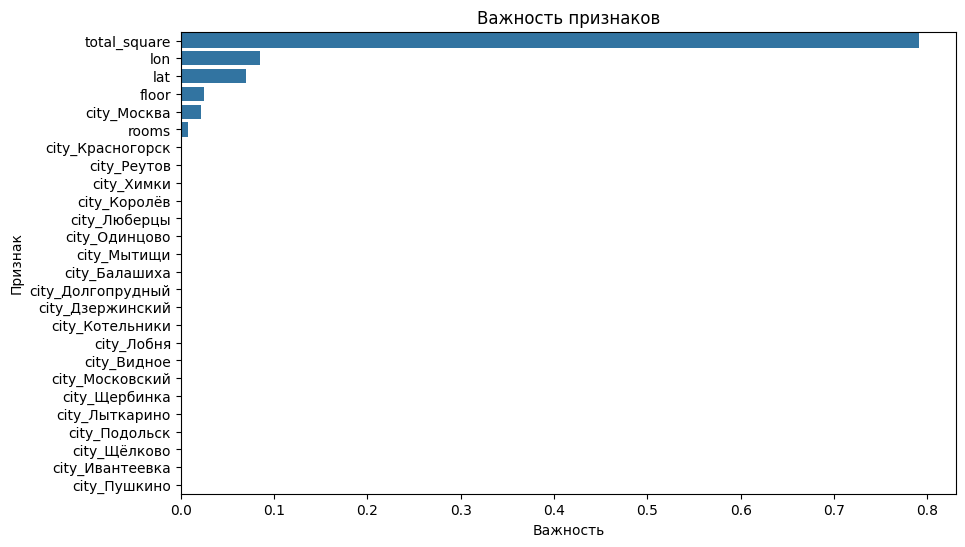

In [128]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.sort_values(by='Importance', ascending=False))
plt.title('Важность признаков')
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.show()

Наиболее важные факторы 
 - total_square (общая площадь) 
 - lon (долгота) и lat (широта) / географическое расположение недвижимости отражает разницу цен в зависимости от района и удаленности от центра 

 Второстепенные факторы
 - floor (этаж) - может указывать на то, что этажность частично влияет на стоимость (например, низкие этажи или верхние в домах без лифта менее привлекательны)
 - city_Москва — бинарный признак, обозначающий расположение объекта в Москве. Цены в Москве будут выше чем в МО. Даже если брать ближайщий город с развитой инфраструктурой Химки. 

LIME

In [129]:
explainer = LimeTabularExplainer(
    training_data=X_train.values,  
    training_labels=y_train.values if hasattr(y_train, 'values') else y_train,
    feature_names=X_train.columns, 
    mode='regression',  
    verbose=True
)

In [130]:
sample_idx = np.random.randint(0, len(X_test))
sample = X_test.iloc[sample_idx]

In [ ]:
exp = explainer.explain_instance(
    data_row=sample.values,   
    predict_fn=best_rf.predict  
)


/Users/daryaarestova/dev/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 45875834.803605795
Prediction_local [19550682.17846322]
Right: 16481240.982


**Предсказание для определнной недвижимости (Prediction_local) - (19550682.17846322)**

Реальная цена - 16 481 240.98

Предсказанная цена - 19 550 682.18

**Oшибка составляет (RMSE) - 3 079 441.2**

In [148]:
exp.show_in_notebook(show_table=True)

- **negative** (Отрицательные значения): Признаки, которые были отрицательно скорректированы моделью (например, площадь total_square, города, такие как Подольск, Щербинка и другие).

- **positive** (Положительные значения): Признаки, которые увеличили предсказанную цену, такие как расположение в городе Москва или координаты (lon, lat), которые указывают на более высокие ценовые районы.

**Если объект недвижимости находится в Москве (значение city_Москва = 1.00), это может объяснять более высокую цену, так как Москва является высокоцелевой локацией для недвижимости.**

**Отрицательные признаки (total_square <= 41.90 и различные другие города МО, как Подольск, Щербинка) показывают, что модель предсказывает меньшую цену.**